In [3]:
%plot inline -w 800 -h 800

In [4]:
function plot_function(interval,fun)
a=interval(1);
b=interval(2);
x=a-3:0.1:b+3;
y1=feval(fun,x);
hold on;
plot(x,y1);
plot(x,zeros(length(x)),'b');
set(gca, "linewidth", 4, "fontsize", 12)
set(gca, 'XTick', floor(a)-3:floor(b)+3)
endfunction

function plot_function_with_points(interval,fun)
plot_function(interval,fun)
a=interval(1);
b=interval(2);
plot_point([a,0],0,'bo',"a");
plot_point([b,0],0,'bo',"b");
plot_point([a,feval(fun,a)],0,'bo',"f(a)");
plot_point([b,feval(fun,b)],0,'bo',"f(b)");
endfunction

function handles = plot_point(xkplus1,k,format,mark)
    handles = [plot(xkplus1(1),xkplus1(2),format),...
    %h = text(xkplus1(1)-0.5,xkplus1(2)-0.2,[char(10),mark,' (' num2str(xkplus1(1),'%.1f') ',' num2str(xkplus1(2),'%.1f') ') ' num2str(k)])];
    h = text(xkplus1(1)-0.5,xkplus1(2)-0.2,[char(10),mark,num2str(k)])];
    set(h, 'fontsize', 16);
endfunction

# Rešavanje nelinearnih jednačina

#### Tema današnjeg predavanja su numeričke metode za rešavanje jednačina kod kojih zavisnost između promenjljivih nije linearna.
#### Jedan primer nelinearne jednačine je kvadratna jednačina:
### $$ax^2+bx+c=0$$
#### Kvadratna jednačina ima analitičko rešenje:
### $$x=\frac{-b\pm \sqrt{b^2-4ac}}{2a}.$$
#### Međutim, postoji veliki broj nelinearnih jednačina u realnim problemima (recimo detekcija kolizija) koje nemaju analitičko rešenje. U tom slučaju koristimo numeričke metode.

## Uvodna napomena:

#### Na ovom predavanju rešavanje nelinearne jednačine posmatraćemo kao određivanje nule funkcije, odnosno određivanje tačke $x$ za koju važi $f(x)=0$.
#### Na primer, tačka x za koju važi $cos(x)=x$ je ista tačka x za koju važi $cos(x)-x=0$.

## Numeričke metode za rešavanje nelinearnih jednačina

#### Postoji dve vrste metoda:
#### 1. **Zatvorene**, kod kojih moramo znamo zatvoreni interval da bi mogli da upotrebimo metodu.
#### 2. **Otvorene**, kod koji metod možemo da upotrebimo sa proizvoljnim početnim rešenjem.

## Metoda polovljenja

#### Najednostavnija metoda. Spada u zatorene metode, odnosno moramo da znamo neki početni interval $[a,b]$ u kome se nalazi rešenje.
#### Da bi mogli da koristimo metodu polovljenja, na intervalu $[a,b]$ funkcija $f(x)$ čiju nulu tražimo mora da bude neprekidna i da seče $x$-osu bar u jednoj tački (da ima nulu na tom zatvorenom intervalu).

#### Na primer, fukcija $cos(x)-x$ ima jednu nulu na intervalu $[-2,2]$

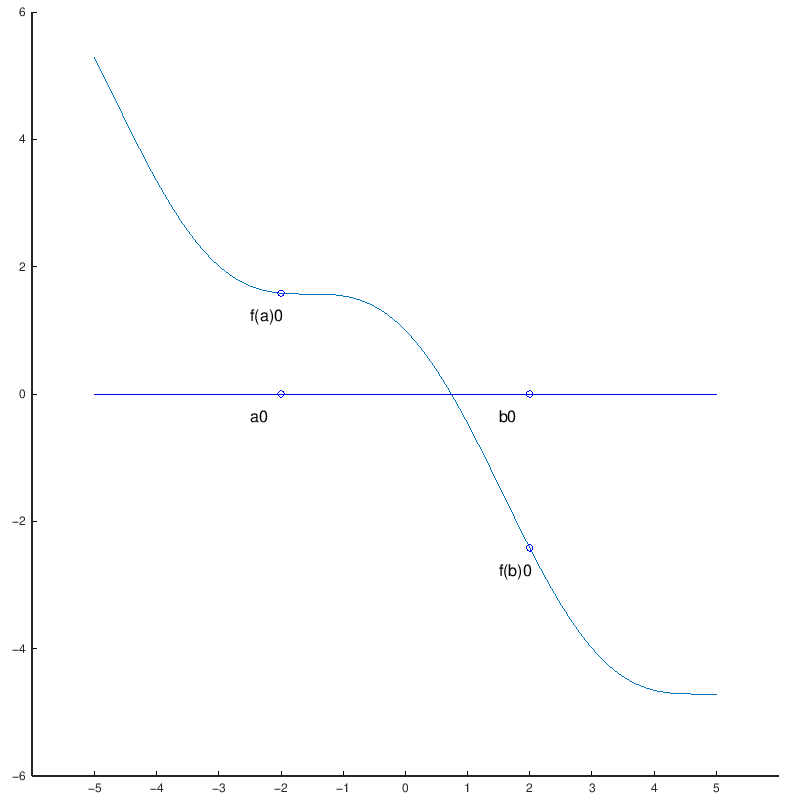

In [5]:
plot_function_with_points([-2,2],@(x)cos(x)-x)

### Algoritam metode polovljenja
#### 1. Proveravamo da li važi $f(a)f(b)<0$, ako ne važi ovde završavamo algoritam
#### Ponavljamo
#### &nbsp;&nbsp;&nbsp;&nbsp;2. Odredimo polovinu interavala $[a,b]$:$$c=\frac{a+b}{2}$$
#### &nbsp;&nbsp;&nbsp;&nbsp;3. Provervavmo da li važi $f(c)=0$, ako važi pronašli smo rešenje i ovde završavamo algoritam.
#### &nbsp;&nbsp;&nbsp;&nbsp;4. Provervamo u kom intervalu od dva ponuđena $[a,c]$ i $[c,b]$ funkcija menja znak, na primer proverimo da li važi:
#### &nbsp;&nbsp;&nbsp;&nbsp;$$f(a)f(c)<0$$.
#### &nbsp;&nbsp;&nbsp;&nbsp;5. Nastavljamo da delimo interval u kome funkcija menja znak, odnosno radimo jedno od $a=c$ ili $b=c$.
#### Kraj ponavljanja
#### 6. Vraćamo $c$ kao rešenje

#### Primer: Rešavamo jedančinu $x+3=0$ na intervalu $[-4,0]$. Rešenje je $x=-3$.
#### Očigledno je da je $x+3=0$ linearna jednačina, ali je namerno odbrana za lakšu ilustraciju metode.

#### Provera početnog uslova

In [6]:
a=-4;
b=0;
fa=feval(@(x)x+3,a)
fb=feval(@(x)x+3,b)
fa*fb<0

fa = -1
fb =  3
ans = 1


#### Iteracija 1.

In [7]:
c=(a+b)/2
fc=feval(@(x)x+3,c)
fc==0

c = -2
fc =  1
ans = 0


In [8]:
fa*fc<0

ans = 1


In [9]:
b=c

b = -2


#### Iteracija 2.

In [10]:
fa=feval(@(x)x+3,a)
fb=feval(@(x)x+3,b)
c=(a+b)/2
fc=feval(@(x)x+3,c)
fc==0

fa = -1
fb =  1
c = -3
fc = 0
ans = 1


#### Pogledaćemo prvo vizualizaciju metode polovljenja pre nego što krenemo na pisanje koda.

In [11]:
function x=polovljenje_viz(a,b,maxIter,tacnost,funkcija)
plot_function([a,b],funkcija)
if(feval(funkcija,a)*feval(funkcija,b)<0)
   for i=1:maxIter
        if i>1
            delete(hc);
            delete(hfc);
        end
        plot_point([a,0],i,'bo',"a");
        plot_point([b,0],i,'bo',"b");
        plot_point([a,feval(funkcija,a)],i,'bo',"f(a)");
        plot_point([b,feval(funkcija,b)],i,'bo',"f(b)");
        
        c=(a+b)/2;
        fc=feval(funkcija,c);
        hc = plot_point([c,0],i,'r*',"c");
        
        if(fc==0||abs(b-a)<tacnost)
            break;
        else
            if(feval(funkcija,c)*feval(funkcija,a)<0)
                b=c;
            else
                a=c;
            end
        end
        hfc = plot_point([c,fc],i,'r*',"f(c)");
    end
    x=c;
end
endfunction

ans = -2


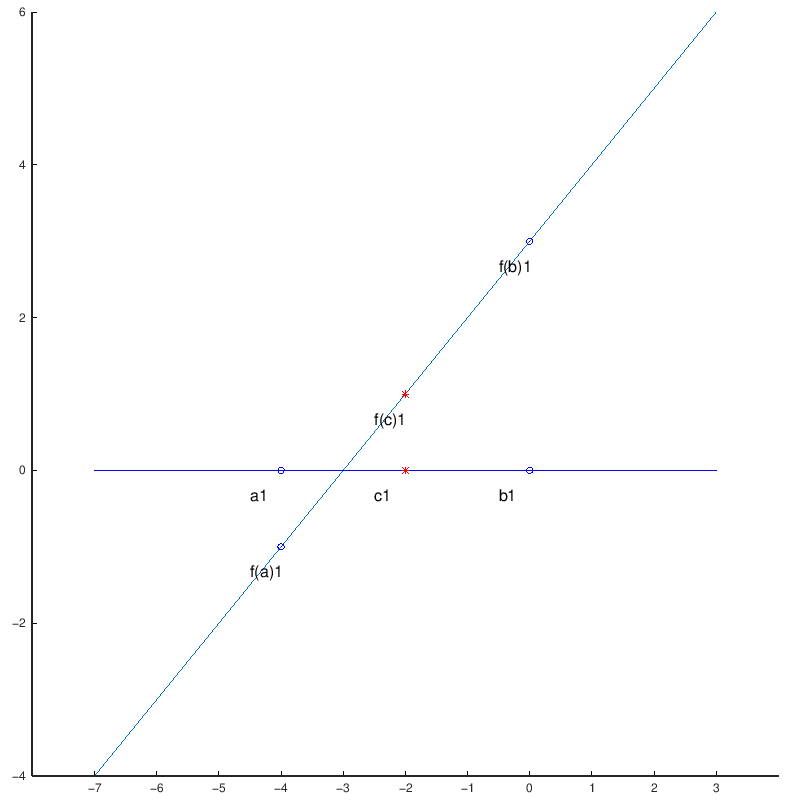

In [12]:
polovljenje_viz(-4,0,1,10^-5,@(x)x+3)

#### Metodu ćemo sada ilustrovati na primer jedančine $cos(x)-x$ na intervalu $[−15,5]$.

ans = -5


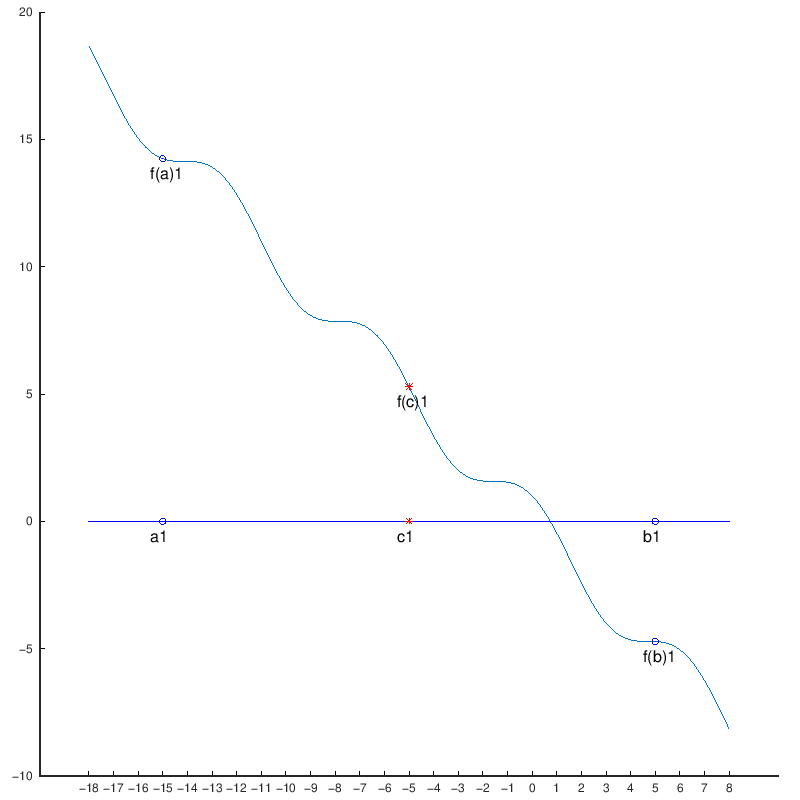

In [13]:
polovljenje_viz(-15,5,1,10^-5,@(x)cos(x)-x)

#### Pogledati animaciju za metodu polovljenja sa slajdova.

#### Pišemo kod za metodu polovljenja.
#### Spajamo kod koji smo gore pisali za primer $x+3$ u jednu celinu:

In [14]:
a=-4;
b=0;
fa=feval(@(x)x+3,a);
fb=feval(@(x)x+3,b);

if fa*fb<0
    for i=1:100
        fa=feval(@(x)x+3,a);
        fb=feval(@(x)x+3,b);
        
        c=(a+b)/2;
        fc=feval(@(x)x+3,c);
        
        [a,b,c,fc]
        
        if fc==0
            break;
        end
        
        if fa*fc<0
            b=c;
        else
            a=c;
        end
    end
end

ans =

  -4   0  -2   1

ans =

  -4  -2  -3   0



In [15]:
function x=polovljenje(a,b,funkcija,maxIter,tacnost)
fa=feval(funkcija,a);
fb=feval(funkcija,b);
if fa*fb<0
    for i=1:maxIter
        fa=feval(funkcija,a);
        fb=feval(funkcija,b);
        
        c=(a+b)/2;
        fc=feval(funkcija,c);
        [i,fc,abs(a-b)]
        if fc==0 || abs(a-b)<tacnost
            break;
        end

        if fa*fc<0
            b=c;
        else
            a=c;
        end
    end
    x=c;
end
endfunction

In [16]:
x=polovljenje(-4,0,@(x)x+3,10,10^-5)

ans =

   1   1   4

ans =

   2   0   2

x = -3


In [17]:
x=polovljenje(-15,5,@(x)cos(x)-x,100,10^-5)

ans =

    1.0000    5.2837   20.0000

ans =

    2    1   10

ans =

   3.0000  -3.3011   5.0000

ans =

   4.00000  -0.93468   2.50000

ans =

   5.00000   0.18596   1.25000

ans =

   6.00000  -0.34569   0.62500

ans =

   7.000000  -0.071216   0.312500

ans =

   8.000000   0.059700   0.156250

ans =

   9.0000000  -0.0051957   0.0781250

ans =

   10.000000    0.027395    0.039062

ans =

   11.000000    0.011135    0.019531

ans =

   12.0000000    0.0029786    0.0097656

ans =

   13.0000000   -0.0011064    0.0048828

ans =

   14.00000000    0.00093668    0.00244141

ans =

   15.000000000   -0.000084701    0.001220703

ans =

   16.00000000    0.00042602    0.00061035

ans =

   17.00000000    0.00017067    0.00030518

ans =

   18.000000000    0.000042986    0.000152588

ans =

   19.000000000   -0.000020857    0.000076294

ans =

   20.000000000    0.000011065    0.000038147

ans =

   21.0000000000   -0.0000048957    0.0000190735

ans =

   22.0000000000    0.0000030847    

### Konvergencija metode polovljenja

#### Metoda polovljenja ima garantovanu konvergenciju jer počinje od zatvorenog intervala koji sadrži rešenje, a metod tako funkcioniše da će sigurno stići do rešenja ili toliko malog intervala da ga nema smisla više poloviti.

### Brzina konvergencije

#### Brzina konvergencije meri kojom brzinom opada greška (rastojanje između trenutnog i tačnog rešenja) kroz iteracije metoda.
#### Brzina se izražava kao oblik funkcije kojoj približno odogvara opadanje greške kroz iteracije.
#### Na primer, ako opadanje greške prati skoro pravu liniju kažemo da metoda konvergira linearno.
#### Ako prati funkciju $f(x)=x^2$ kažemo da konvergira kvadratno itd. Očigledno je da je kvadratna konvergencija bolja od linearne itd.

In [18]:
function x=polovljenje_konvergencija(a,b,funkcija,maxIter,tacnost)
fa=feval(funkcija,a);
fb=feval(funkcija,b);
greske = zeros(1,maxIter);
if fa*fb<0
    for i=1:maxIter
        fa=feval(funkcija,a);
        fb=feval(funkcija,b);
        
        c=(a+b)/2;
        fc=feval(funkcija,c);
        if fc==0 || abs(a-b)<tacnost
            break;
        end

        if fa*fc<0
            b=c;
        else
            a=c;
        end
        greske(i)=abs(a-b);
    end
    x=c;
end

plot(1:maxIter,log10(greske),'Color', [1 0 0], 'LineWidth', 2);
set(gca, 'XTick', 1:5:25)
xlabel('Iteracije')
ylabel('logaritam10 od abs(b-a)')
set(gca, "linewidth", 4, "fontsize", 16)
endfunction

#### Prikazaćemo na koji način opada veličina intervala $[a,b]$ što se može grubo može smatrati greškom za primer jednačine $cos(x)-x$

x =  0.73908


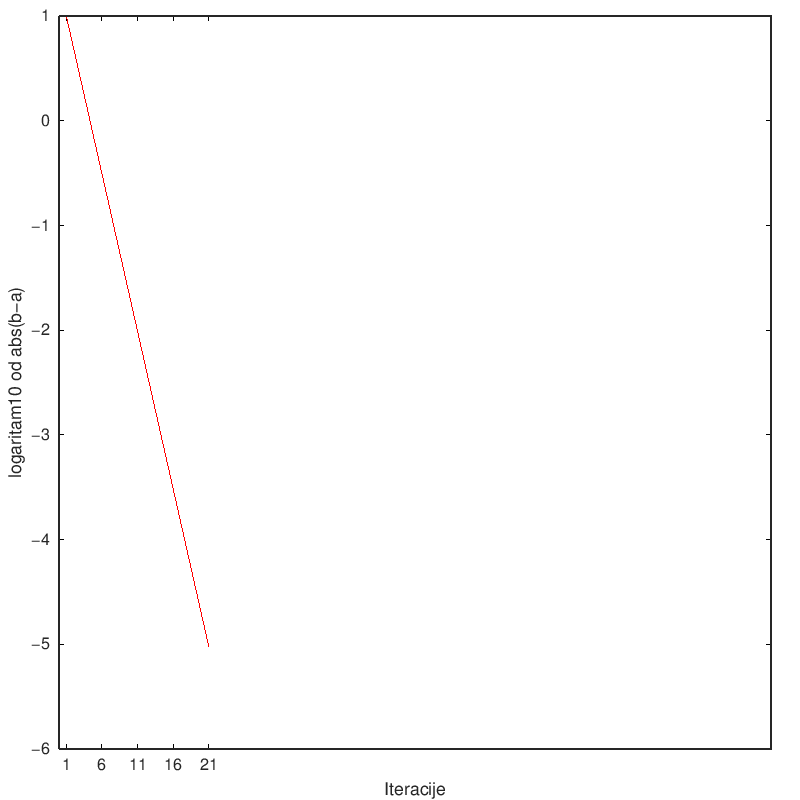

In [19]:
x=polovljenje_konvergencija(-15,5,@(x)cos(x)-x,100,10^-5)

#### Vidimo da greška opada kao prava linija što ilustruje da je konvergencija metode polovljenja linearna.

## Metoda sečice

#### Mana metode polovljenja to što ne koristi vrednosti već samo znak funkcije $f(x)$ u svom algoritmu.
#### Metoda sečice koristi funkciju vrednosti funkcije $f(x)$.
#### Ideja je da prilikom traženja nule, $f(x)$ zamenimo pravom na malom intervalu (linearna interpolacija).
#### Umesto da tražimo nulu $f(x)$ koja može biti komplikovanog oblika, tražimo nulu prave koja je jednostavna.

### Algoritam metode sečice

#### Imamo dve tačke $x_1$ i $x_2$ i funkciju $f(x)$ čiju nulu određujuemo. 
#### Cilj nam je da pronađemo tačku gde prava između tačaka  $(x_1,f(x_1))$ i $(x_2,f(x_2))$ seče x-osu.
#### Ako imamo pravu $y=kx+n$ ona tačku u kojoj seče x-osu možemo odrediti na sledeći način:
### $$y=kx+n\\y=0\\0=kx+n\\x=-\frac{n}{k}$$
#### Određujemo sada jednačinu prave $y=kx+n$ kroz tačke  $(x_1,f(x_1))$ i $(x_2,f(x_2))$:
### $$f(x_1)=kx_1+n\\f(x_2)=kx_2+n$$
#### Oduzimamo drugu od prve jednačine:
### $$f(x_1)-f(x_2)=k(x_1-x_2)$$
#### Određujemo $k$:
### $$k=\frac{f(x_1)-f(x_2)}{x_1-x_2}$$
#### Određujemo $n$ zamenom $k$ u prvu jednačinu:
### $$f(x_1)=\frac{f(x_1)-f(x_2)}{x_1-x_2}x_1+n\\n=f(x_1)-\frac{f(x_1)-f(x_2)}{x_1-x_2}x_1$$
#### Određujemo tačku $x_3$ kao tačku u kojoj prava između $(x_1,f(x_1))$ i $(x_2,f(x_2))$ sečce x-osu:
### $$x_3=-\frac{n}{k}\\x_3=-\frac{f(x_1)-\frac{f(x_1)-f(x_2)}{x_1-x_2}x_1}{\frac{f(x_1)-f(x_2)}{x_1-x_2}}\\x_3=x_1-\frac{f(x_1)}{\frac{f(x_1)-f(x_2)}{(x_1-x_2)}}\\x_3=x_1-f(x_1)\frac{x_1-x_2}{f(x_1)-f(x_2)}$$
#### Ako sada umesto $x_3,x_2 i x_1$ redom pišemo $x_{n+1},x_n i x_{n-1}$ dobijamo opštu formulu za metodu sečice:
### $$x_{n+1}=x_{n-1}-f(x_{n-1})\frac{x_{n-1}-x_n}{f(x_{n-1})-f(x_n)}$$

#### Primer: Primenićemo sada metodu sečice na funkciju $f(x)=x^2-2$ za početne vrenosti $x_1=0$ i $x_2=3$.
### $$x_{n+1}=x_{n-1}-f(x_{n-1})\frac{x_{n-1}-x_n}{f(x_{n-1})-f(x_n)}$$

### $$x_3=x_1-f(x_1)\frac{x_1-x_2}{f(x_1)-f(x_2)}\\f(x_1)=f(0)=0^2-2=-2\\f(x_2)=f(3)=3^2-2=7\\x_3=0-(-2)\frac{-0-3}{-2-7}=\frac{2}{3}$$

In [20]:
function x=secica_viz(a,b,funkcija,maxIter,tacnost)
plot_function([a,b],funkcija)
    for i=1:maxIter
         if i>1
            delete(hc);
            %delete(hp);
        end
    
        fa=feval(funkcija,a);
        fb=feval(funkcija,b);
        
        k=(fb-fa)/(b-a);
        n=fb-k*b;
        c=-n/k;
        
        fc=feval(funkcija,c);
        
        plot_point([a,0],i,'bo',"a");
        plot_point([b,0],i,'bo',"b");
        plot_point([a,feval(funkcija,a)],i,'bo',"f(a)");
        plot_point([b,feval(funkcija,b)],i,'bo',"f(b)");
        hc = plot_point([c,0],i,'r*',"c");
        tmp=linspace(min([a,b]),max([a,b]),100);
        hp=plot(tmp,k.*tmp.+n);

        if(abs(fc)<tacnost)
            break;
        end
        a=b;
        b=c;
    end
    x=c;
endfunction

ans =  0.66667


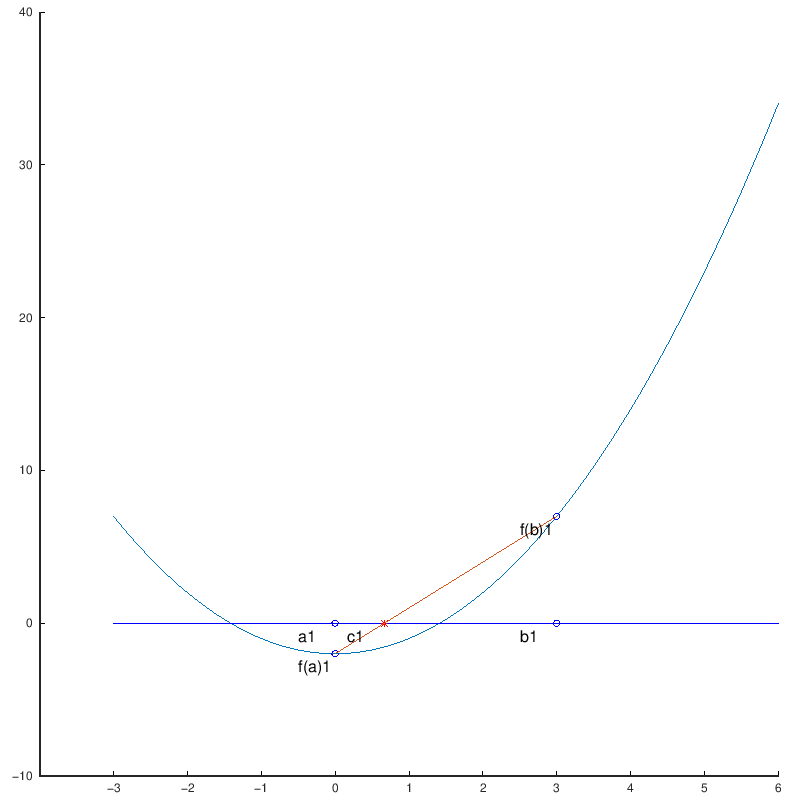

In [21]:
secica_viz(0,3,@(x)x.^2-2,1,10^-5)

### $$x_4=x_2-f(x_2)\frac{x_2-x_3}{f(x_2)-f(x_3)}\\f(x_2)=7\\f(x_3)=f(\frac{2}{3})=(\frac{2}{3})^2-2=-\frac{14}{9}\\x_4=3-7\frac{3-\frac{2}{3}}{7+\frac{14}{9}}=3-7\frac{3}{11}=\frac{12}{11}$$

ans =  1.0909


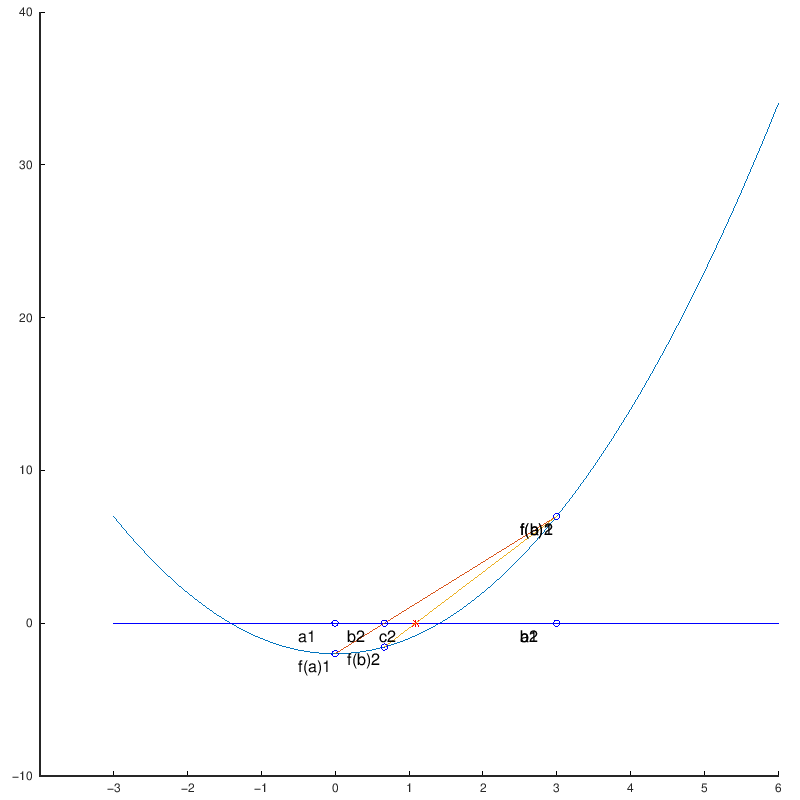

In [22]:
secica_viz(0,3,@(x)x.^2-2,2,10^-5)

ans = -0.93959


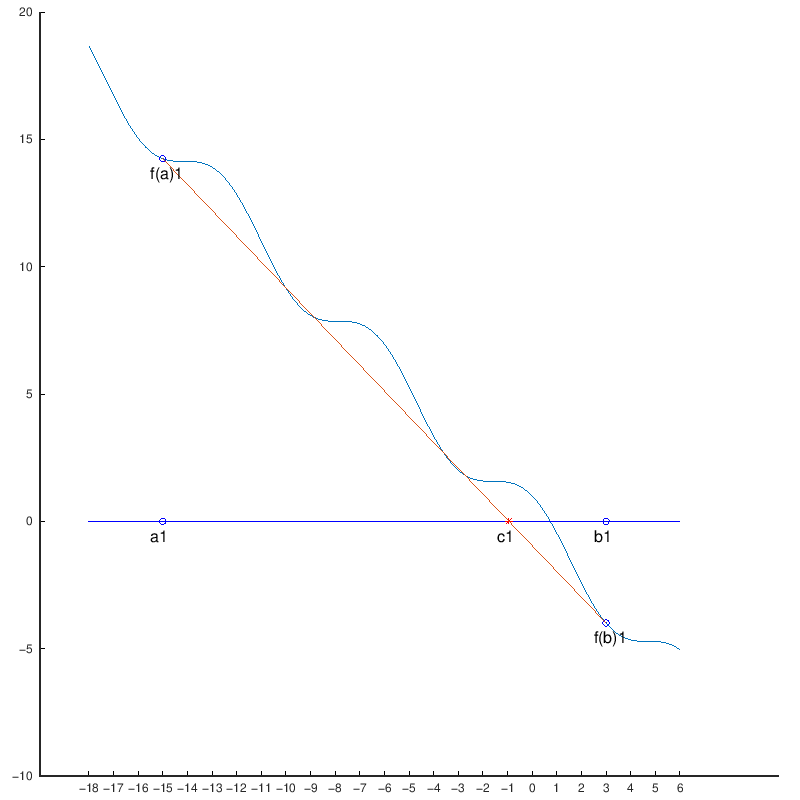

In [23]:
secica_viz(-15,3,@(x)cos(x)-x,1,10^-5)

#### Pogledati animaciju za metodu sečice sa slajdova.

#### Pišemo kod za metodu sečice.

In [24]:
function x=secica(a,b,funkcija,maxIter,tacnost)
    for i=1:maxIter
        fa=feval(funkcija,a);
        fb=feval(funkcija,b);
        
        k=(fb-fa)/(b-a);
        n=fb-k*b;
        c=-n/k;
        
        fc=feval(funkcija,c);
        
        [i,fc]
        
        if(abs(fc)<tacnost)
            break;
        end
        a=b;
        b=c;
    end
    x=c;
endfunction

In [25]:
x=secica(0,3,@(x)x.^2-2,10,10^-5)

ans =

   1.0000  -1.5556

ans =

   2.00000  -0.80992

ans =

   3.00000   0.40785

ans =

   4.000000  -0.047300

ans =

   5.0000000  -0.0022181

ans =

   6.000000000   0.000013279

ans =

   7.0000000000000  -0.0000000036839

x =  1.4142


In [26]:
x=secica(-15,5,@(x)cos(x)-x,100,10^-5)
x=polovljenje(-15,5,@(x)cos(x)-x,100,10^-5)

ans =

   1.00000   0.97563

ans =

   2.00000  -0.23750

ans =

   3.000000   0.048358

ans =

   4.0000000   0.0013987

ans =

   5.0000000000  -0.0000091257

x =  0.73909
ans =

    1.0000    5.2837   20.0000

ans =

    2    1   10

ans =

   3.0000  -3.3011   5.0000

ans =

   4.00000  -0.93468   2.50000

ans =

   5.00000   0.18596   1.25000

ans =

   6.00000  -0.34569   0.62500

ans =

   7.000000  -0.071216   0.312500

ans =

   8.000000   0.059700   0.156250

ans =

   9.0000000  -0.0051957   0.0781250

ans =

   10.000000    0.027395    0.039062

ans =

   11.000000    0.011135    0.019531

ans =

   12.0000000    0.0029786    0.0097656

ans =

   13.0000000   -0.0011064    0.0048828

ans =

   14.00000000    0.00093668    0.00244141

ans =

   15.000000000   -0.000084701    0.001220703

ans =

   16.00000000    0.00042602    0.00061035

ans =

   17.00000000    0.00017067    0.00030518

ans =

   18.000000000    0.000042986    0.000152588

ans =

   19.000000000   -0.000020

## Konvergencija metode sečice

#### Konvergencija metode sečice je super-linearna.
#### To znači da se odnos greške i iteracija menja linearno, tj. $greska = k * itreacija + n$, ali se $k$ kod metode sečice smanjuje kroz iteracije, dakle konvergencija je sve brža. Na primer na početku može da važi $greska = k_1\cdot itreacija + n$, a posle nekoliko iteracija $greska = k_2\cdot itreacija + n$ itd.
#### Kod metode polovljenja vrednost $k$ se ne menja kroz iteracije, odnosno trenutna greška je uvek polovina prethodne greške.

In [27]:
function x=secica_konvergencija(a,b,funkcija,maxIter,tacnost)
    greske = zeros(1,maxIter);
    for i=1:maxIter
        fa=feval(funkcija,a);
        fb=feval(funkcija,b);
        
        k=(fb-fa)/(b-a);
        n=fb-k*b;
        c=-n/k;
        
        fc=feval(funkcija,c);
        greske(i)=fc;
        
        if(abs(fc)<tacnost)
            break;
        end
        a=b;
        b=c;
    end
    x=c;
    plot(1:maxIter,log10(greske),'Color', [0 1 0], 'LineWidth', 2);
    set(gca, 'XTick', 1:5:25)
    xlabel('Iteracije')
    ylabel('logaritam10 od abs(b-a) i f(c)')
    set(gca, "linewidth", 4, "fontsize", 16)
endfunction

x_pol =  0.73908
x_sec =  0.73909


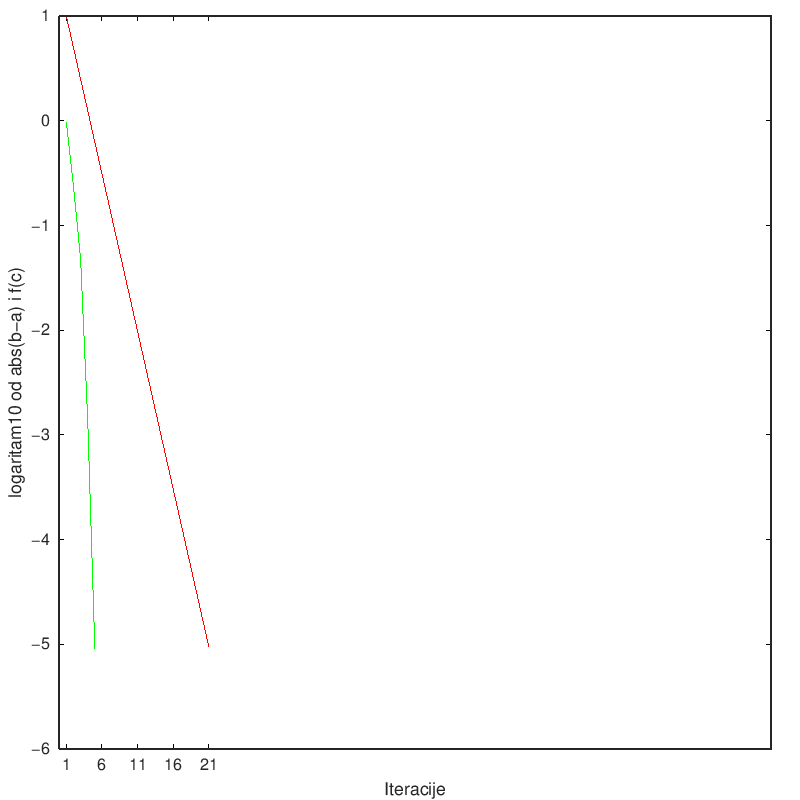

In [28]:
x_pol=polovljenje_konvergencija(-15,5,@(x)cos(x)-x,100,10^-5)
hold on;
x_sec=secica_konvergencija(-15,5,@(x)cos(x)-x,100,10^-5)

#### Sečica je otvorena metoda i nema garantovanu konvergenciju. Ona zavisi od odabira početnih vrednosti.

## Metoda regula falsi

#### Regula falsi je modifkacija metode sečice koja kombinuje metodu polovljenja i metodu sečice.
#### Regula falsi zahteva zatvoren iterval u kome se nalazi rešenje kao uslov za pokretanje.
#### Tokom izvršvavanja sečica se povlači uvek kroz tačake između kojih funkcija menja znak.
#### Na ovom predvanju nećemo detaljno obrađivati metodu regula falsi. Kao dodatni neobavezan zadatak, možete napisati kod za metodu regula falsi pomoću kodova sa ovog predavanja.

## Njutnova metoda

#### Njutnova metoda ili metoda tangente koristi istu logiku kao metoda sečice, ali se umesto sečice koristi tangenta.
#### Pretpostavka je da tangenta bolje prati funkciju od sečice pa će samim tim ovaj metod brže konvergirati od metode sečice.
#### Metod je otvoren i zahteva samo jednu početnu tačku. Samim tim konvergencija nije garantovana, ali je kvadrtna kada metod konvergira.
#### Njutnova metoda je najbrža metoda koji učimo danas, ali (kao što ćete videti u nastavku) zahteva izvod funkcije koji nije uvek lako ni brzo izračunljiv.

## Algoritam Njutnove metode

#### Krenućemo od jednačine tangente u nekoj tački $x_1$, a $x_2$ ćemo odrediti kao tačku u kojoj ta tangenta seče x-osu.
#### Jednačina tagente u tački $x_i$:
### $$y_i=f(x_i)+f'(x_i)(x-x_i)$$
#### gde je $f'(x_i)$ izvod funkcije $f(x)$ u tački $x_i$.
#### Postavljamo $y_i = 0$, ubacujemo $x_1$ umesto $x_i$, i izražavamo tačku $x_2$ kao tačku $x$ na tangenti za koju važi $y_i = 0$:
### $$0=f(x_1)+f'(x_1)(x_2-x_1)\\f'(x_1)x_2=f(x_1)-f'(x_1)x_1\\x_2=x_1-\frac{f(x_1)}{f'(x_1)}$$

#### Ako sada umesto $x_2$ i $x_1$ redom pišemo $x_{n+1}$ i $x_n$ dobijamo opštu formulu za Njutnovu metodu:
### $$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

#### Primer: Primenićemo sada metodu tangente na funkciju $f(x)=x^2-2$ za početnu vrenosti $x_1=9$. Da li možemo da odaberemo baš bilo koju tačku? Šta bi bilo da smo odabrali $x_1=0$?
### $$x_2=x_1-\frac{f(x_1)}{f'(x_1)}\\f(9)=9^2-2=79\\f'(9)=2\cdot9=18\\x_2=9-\frac{f(9)}{f'(9)}\\x_2=9-\frac{79}{18}=4.6111$$

In [29]:
function x=tangenta_viz(x1,funkcija,izvod,maxIter,tacnost)
x2=x1;
plot_function([x1-10,x1+1],funkcija)
    for i=1:maxIter
        if i>1
            delete(hc);
        end
        fx1=feval(funkcija,x1);
        fizvodx1=feval(izvod,x1);
      
        x2=x1-fx1/fizvodx1;
        fx2=feval(funkcija,x2);
        
        plot_point([x1,0],i,'bo',"x1");
        plot_point([x1,feval(funkcija,x1)],i,'bo',"f(x1)");
        hc = plot_point([x2,0],i,'r*',"x2");
        tmp=linspace(x2-3,x1+5,100);
        hp=plot(tmp,fx1+fizvodx1.*(tmp-x1));

        if(abs(fx2)<tacnost)
            break;
        end
        x1=x2;
    end
    x=x2;
endfunction

ans =  4.6111


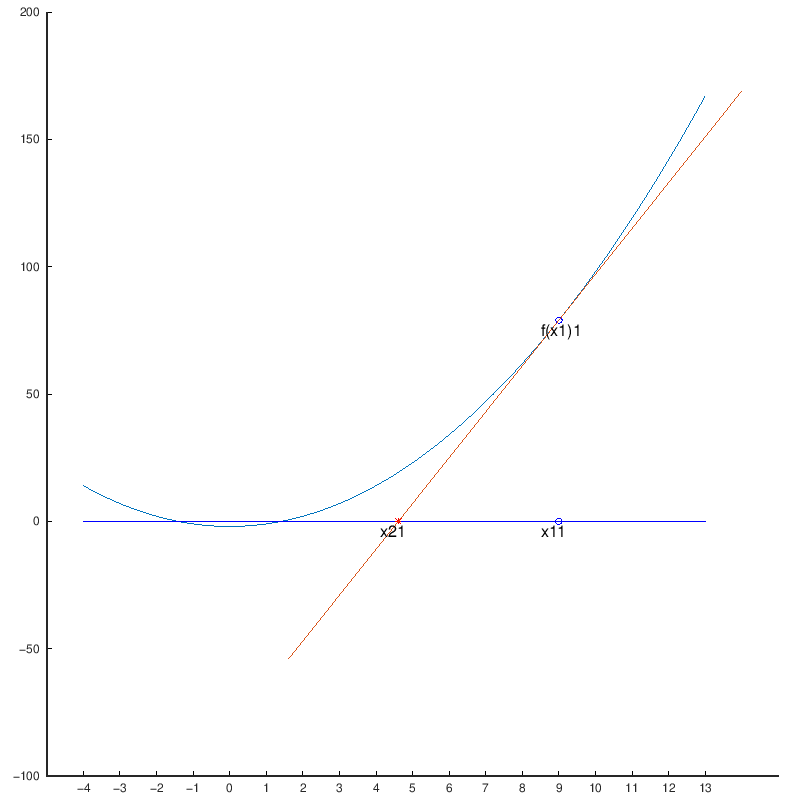

In [30]:
tangenta_viz(9,@(x)x.^2-2,@(x)2.*x,1,10^-5)

### $$x_3=x_2-\frac{f(x_2)}{f'(x_2)}\\f(4.6111)=4.6111^2-2=19.262\\f'(4.6111)=2\cdot4.6111=9.222\\x_3=4.6111-\frac{f(4.6111)}{f'(4.6111)}\\x_2=4.6111-\frac{19.262}{9.222}=2.5224$$

ans =  2.5224


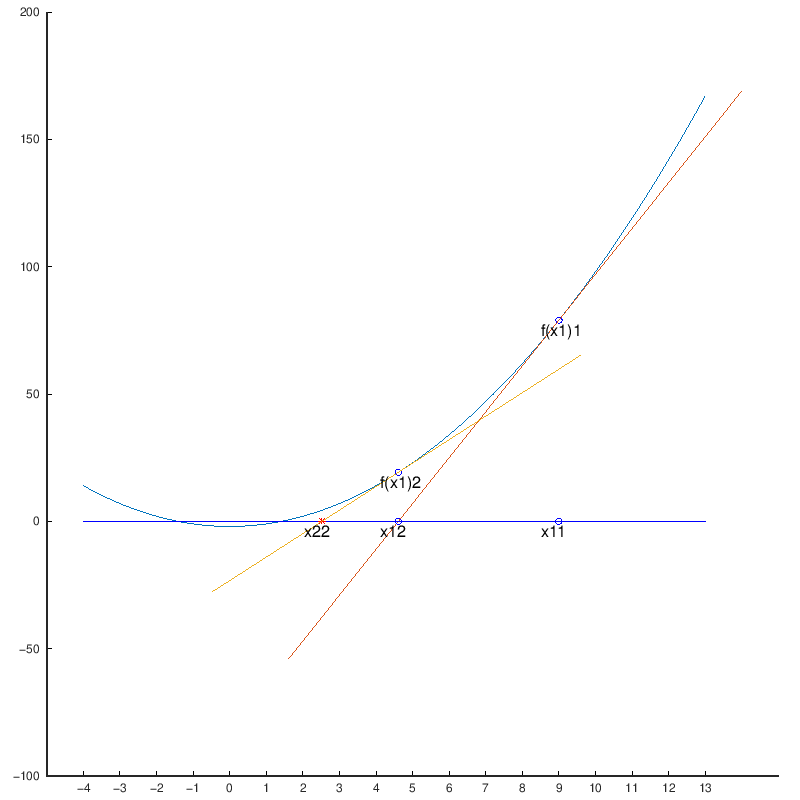

In [31]:
tangenta_viz(9,@(x)x.^2-2,@(x)2.*x,2,10^-5)

#### Pogledati animaciju za metodu tangente sa slajdova.

#### Pišemo kod za metodu tangente.

In [32]:
function x=tangenta(x1,funkcija,izvod,maxIter,tacnost)
    x2=x1;
    for i=1:maxIter
        fx1=feval(funkcija,x1);
        fizvodx1=feval(izvod,x1);
      
        x2=x1-fx1/fizvodx1;
        
        fx2=feval(funkcija,x2);
        
        [i,x2,fx2]
        
        if(abs(fx2)<tacnost)
            break;
        end
        x1=x2;
    end
    x=x2;
endfunction

In [33]:
x=tangenta(9,@(x)x.^2-2,@(x)2.*x,10,10^-15)

ans =

    1.0000    4.6111   19.2623

ans =

   2.0000   2.5224   4.3626

ans =

   3.00000   1.65766   0.74782

ans =

   4.000000   1.432089   0.050880

ans =

   5.00000000   1.41432513   0.00031557

ans =

   6.000000000000   1.414213566773   0.000000012446

ans =

   7.0000e+00   1.4142e+00   4.4409e-16

x =  1.4142


In [34]:
x=tangenta(5,@(x)cos(x)-x,@(x)-sin(x)-1,10,10^-5)
disp('----------------------------------')
x=secica(-15,5,@(x)cos(x)-x,100,10^-5)
disp('----------------------------------')
x=polovljenje(-15,5,@(x)cos(x)-x,100,10^-5)

ans =

     1.0000  -109.8206   108.8297

ans =

    2.0000   15.9608  -16.9290

ans =

   3.0000  -6.6151   7.5605

ans =

   4.0000   4.6001  -4.7122

ans =

     5.0000  -743.6197   743.0281

ans =

      6.0000   3090.7584  -3089.9158

ans =

      7.0000  -3606.1401   3607.0579

ans =

      8.0000  -1024.2182   1025.2165

ans =

    9.0000   65.2592  -66.0149

ans =

   10.000   25.371  -24.400

x =  25.371
----------------------------------
ans =

   1.00000   0.97563

ans =

   2.00000  -0.23750

ans =

   3.000000   0.048358

ans =

   4.0000000   0.0013987

ans =

   5.0000000000  -0.0000091257

x =  0.73909
----------------------------------
ans =

    1.0000    5.2837   20.0000

ans =

    2    1   10

ans =

   3.0000  -3.3011   5.0000

ans =

   4.00000  -0.93468   2.50000

ans =

   5.00000   0.18596   1.25000

ans =

   6.00000  -0.34569   0.62500

ans =

   7.000000  -0.071216   0.312500

ans =

   8.000000   0.059700   0.156250

ans =

   9.0000000  -0.0051957   0.078

#### Metoda tangente divergira za početnu vrednost $x_1=5$. To je zato što je tačka $x_1=5$ skoro tačka prevoja, tj. važi $f'(5)=-sin(5)-1=-0.041$. Što možemo videti i na grafiku.

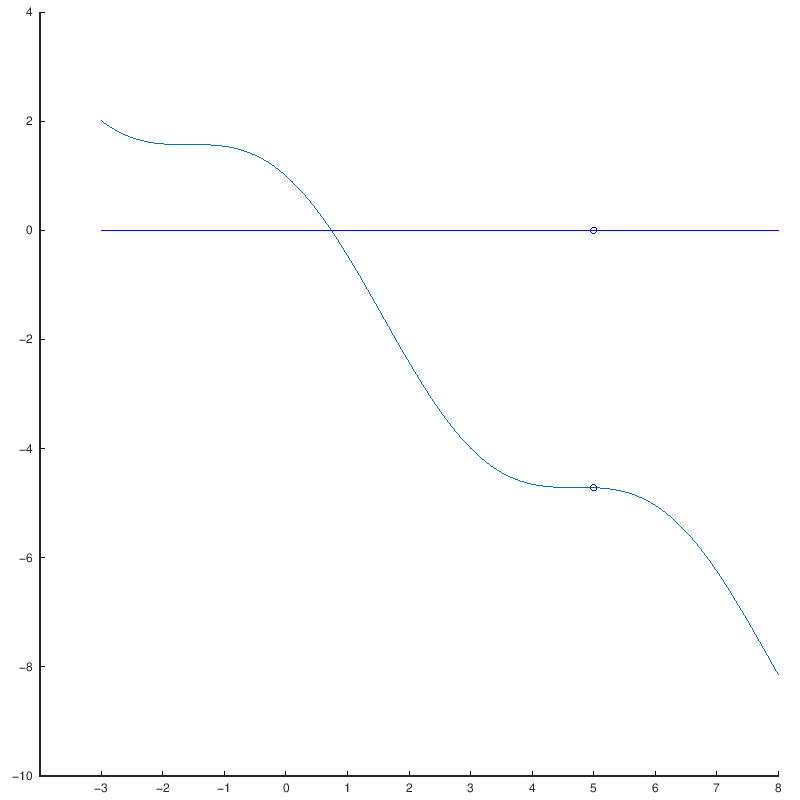

In [35]:
plot_function([0,5],@(x)cos(x)-x)
plot(5,0,'bo');
plot(5,cos(5)-5,'bo');

#### Sada menjamo početnu tačku na $x_1=2.5$ i poredimo metode.

In [36]:
x=tangenta(-2.5,@(x)cos(x)-x,@(x)-sin(x)-1,10,10^-5)
disp('----------------------------------')
x=secica(-2.5,2.5,@(x)cos(x)-x,100,10^-5)
disp('----------------------------------')
x=polovljenje(-2.5,2.5,@(x)cos(x)-x,100,10^-5)

ans =

   1.0000   1.7310  -1.8905

ans =

   2.000000   0.779651  -0.068492

ans =

   3.00000000   0.73943326  -0.00058268

ans =

   4.000000000000   0.739085159965  -0.000000044770

x =  0.73909
----------------------------------
ans =

   1.0000   1.4970

ans =

   2.00000   0.74512

ans =

   3.00000  -0.93366

ans =

   4.000000   0.094587

ans =

   5.0000000   0.0084188

ans =

   6.00000000  -0.00011007

ans =

   7.00000000000   0.00000012272

x =  0.73909
----------------------------------
ans =

   1   1   5

ans =

   2.00000  -0.93468   2.50000

ans =

   3.00000   0.18596   1.25000

ans =

   4.00000  -0.34569   0.62500

ans =

   5.000000  -0.071216   0.312500

ans =

   6.000000   0.059700   0.156250

ans =

   7.0000000  -0.0051957   0.0781250

ans =

   8.000000   0.027395   0.039062

ans =

   9.000000   0.011135   0.019531

ans =

   10.0000000    0.0029786    0.0097656

ans =

   11.0000000   -0.0011064    0.0048828

ans =

   12.00000000    0.00093668    0.00244

#### Vidimo da metoda tangente najbrže (za 4 iteracije) stiže do rešenja.

## Konvergencija Njutnove metode

#### Njutnova metoda konvergira kvadratno, odnosno odnos iteracija i greške je kvadratna funkcija.
#### Kao što smo videli na jednom od prethodnih primera, konvergencija Njutnove metode nije garantovana i zavisi od izbora početnog rešenja.
#### Ako bismo u praksi hteli da što brže garantovano stignemo do tačnog rešenja, jedna od opcija bi bila da znamo bar grubo neki veći zatvoreni interval u kome je rešenje, pa da pokrenemo nekoliko iteracije metode polovljenja, pa onda kad suzimo interval odabremo neko početno rešenje i pokrenemo Njutnovu metodu.

In [37]:
function x=tangenta_konvergencija(x1,funkcija,izvod,maxIter,tacnost)
    x2=x1;
    greske = zeros(1,maxIter);
    for i=1:maxIter
        fx1=feval(funkcija,x1);
        fizvodx1=feval(izvod,x1);
      
        x2=x1-fx1/fizvodx1;
        
        fx2=feval(funkcija,x2);
        
        greske(i)=fx2;
        if(abs(fx2)<tacnost)
            break;
        end
        x1=x2;
    end
    x=x2;
    plot(1:maxIter,log10(greske),'Color', [0 0 1], 'LineWidth', 2);
    set(gca, 'XTick', 1:2:25)
    xlabel('Iteracije')
    ylabel('logaritam10 od abs(b-a) i f(c)')
    set(gca, "linewidth", 4, "fontsize", 12)
endfunction

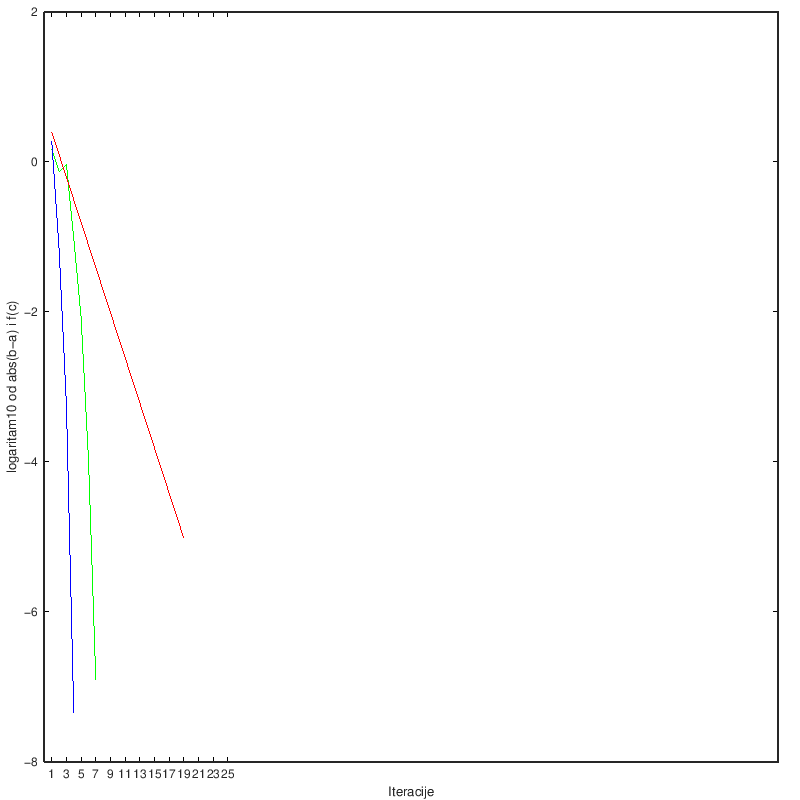

In [38]:
x=secica_konvergencija(-2.5,2.5,@(x)cos(x)-x,100,10^-5);
hold on;
x=polovljenje_konvergencija(-2.5,2.5,@(x)cos(x)-x,100,10^-5);
hold on;
x=tangenta_konvergencija(-2.5,@(x)cos(x)-x,@(x)-sin(x)-1,10,10^-5);